# Empirical LIF Neuron Response Curve Calculation

This notebook demonstrates the use of the `nengo_conductance_synapses.sim_cond_exp` module which emprically measures the response curve of a LIF neuron with conductance based synapses. It requires `make`, a C++ compiler and the `cinder` library.

In [347]:
%load_ext autoreload
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from nengo_conductance_synapses import sim_cond_exp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [565]:
%autoreload

# Define all simulation parameters (these are the default values)
task = sim_cond_exp.task(
         cm=1e-9,
         g_leak=50e-9,
         v_thresh=-50e-3,
         v_rest=-65e-3,
         v_reset=-65e-3,
         tau_refrac=2e-3,
         tau_syn_e=20e-3,
         w_syn_e=0.01e-6,
         e_rev_syn_e=0e-3,
         tau_syn_i=10e-3,
         w_syn_i=1.0e-6,
         e_rev_syn_i=-75e-3,
         repeat=20,
         spike_loss_e=1 - 1.0 / 10.0,
         spike_loss_i=1 - 0.1 / 10.0,
         T=10.0);

res = np.linspace(0, 4000, 20)
ris = np.linspace(0, 4000, 21)

# Create a SimCondExp object and submit the task, wait until the simulation
# has finished
output_rates = np.zeros((len(ris), len(res)))
with sim_cond_exp.SimCondExp() as sim:
    def make_callback(i, j):
        def callback(_, rates):
            output_rates[j, i] = np.mean(rates)
        return callback
    for i, re in enumerate(res):
        for j, ri in enumerate(ris):
            task["input"]["rate_e"] = re
            task["input"]["rate_i"] = ri
            sim.submit(task, make_callback(i, j))



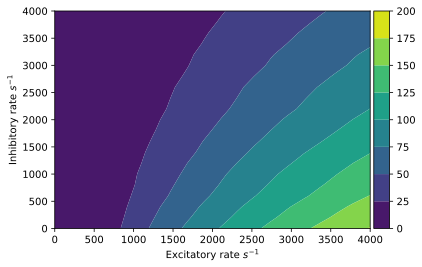

In [566]:
fig, ax = plt.subplots()
contour = ax.contourf(res, ris, output_rates, cmap='viridis')
ax.set_xlabel('Excitatory rate $s^{-1}$')
ax.set_ylabel('Inhibitory rate $s^{-1}$')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

fig.colorbar(contour, cax=cax, orientation='vertical')